<a href="https://colab.research.google.com/github/rackysingh/Bank_Marketing_on_ML-classification-project/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Bank Marketing Effectiveness Prediction**

## Project Type - Classification
Contribution - Team

Team Member 1 - Racky Kumar

Team Member 2 - Jayesh Yadav

Team Member 3 - Mangal Lokhande

Team Member 4 - Rubina Fathima
 
*GitHub Link -*https://github.com/rackysingh/Bank_Marketing_on_ML-classification-project

# **Project Summary -**


### One of the industries that is being transformed the most by the recent Machine learning advances is the finance industry. Be it predicting the stock prices, or in our case predicting, a customer willingness to subscribe to a term deposit. Therefore, in our project we have come up with a solution that increases the efficiency by making fewer calls but improves the success rate.

### In this report, we train a model to predict if the client will subscribe to a term deposit or not.The data set was obtained from the data of direct marketing campaigns (phone calls) of a Portuguese banking institution.

### First we did Exploratory Data Analysis on the data set.The Bank data contains 45211 records and 17 columns. It contains 7 numerical (int) and 10 Categorical (object) datatypes columns. After initial data exploration, we didn’t find any duplicated records and missing values in any column. The target variable has highly imbalanced distribution. This was our main challenge. In classification problems we need to keep in mind that only Accuracy score doesn’t give true picture about classification. Accuracy score usually gives higher weightage to the majority class. We looked for outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering to modify few existing columns.

### We then look at several popular individual models from simple ones like Logistic Regression to more complicated ensemble ones like Random Forest . Additionally, few options for model formulation were tried - first we differentiate numerical and categorical columns, then we analyze both of them separately, we do label encoding on categorical columns too. 

### Some numerical feature values converted into range of values for model building and interpretability. Using SMOTE the given target variable balanced for model.LIME has been applied on random forest and XGboost also SHAP has been implemented to know more about the important features.

### We also tried different algorithms such as Logistic regression,Random Forest,KNN,XGboost using under sampling and over sampling.Hyperparameters were tuned using GridSearchCV cross validation using 5 folds on part of the provided training data set. Among all tried algorithms Random Forest performed the best with F1 of 0.89 score (over sampling) followed by XGboost with F1 score of 0.86.




## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

## **Importing All The Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## **Mount And Load The Data Set**

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Dataset
df= pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Copy of bank-full.csv',delimiter=';')

# **Understanding More About The Data**


### **Summary Of Data**

In [ ]:
# View the data of top 5 rows to take a glimps of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
#Shape of the Dataset
df.shape

(45211, 17)

#### **Information About Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#List of numerical columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
#List of categorical columns
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

### **Check The Unique Values**

In [ ]:
#Print the unique value
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### **Check For The Null Values**

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 **There is no null values in the dataset**

### **Checking For Duplicate values**

In [ ]:
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


 **There is no duplicate values in the dataset**



#### **Summary Statastics**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Target Variable**

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**As We Can See that Data is highly imbalanced.**

# **EDA On Dataset**

#### **On Target Variable**

### **Comparing dependent varibale 'y' with 'age' column.**

In [ ]:
df.groupby(['y'],as_index=False).agg({'age':pd.Series.mean})

,y,age
0,no,40.838986
1,yes,41.670070


### **Comparing dependent variable 'y' and 'job'.**

In [ ]:
df.groupby(['y', 'job']).size().unstack(fill_value=0)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


Above code gives output:
blue-collar job holders are at higher in count for not taking subscription.
admin  job position people are at second place for not taking subscription.

Among subscribed customers Management job holders are higher in count.


### **Comparing dependent variable 'y' and 'marital' column.**

In [ ]:
marital_status=df.groupby(['y'])['marital'].value_counts()
marital_status

y    marital 
no   married     24459
     single      10878
     divorced     4585
yes  married      2755
     single       1912
     divorced      622
Name: marital, dtype: int64

According to the dataset Married persons have subscribed higher than single and divorced people.

### **Comparing 'contact' column and dependant variable i.e subscription column 'y'.**


In [ ]:
contact_status=df.groupby(['y'])['contact'].value_counts()
contact_status

y    contact  
no   cellular     24916
     unknown      12490
     telephone     2516
yes  cellular      4369
     unknown        530
     telephone      390
Name: contact, dtype: int64

Contact column with 'unknown'  values of around 530 have subscribed the plan.


### **Comparing  'education' column and dependant variable i.e subscription column 'y'.**


In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df.groupby('y')['education'].value_counts()

y    education
no   secondary    20752
     tertiary     11305
     primary       6260
     unknown       1605
yes  secondary     2450
     tertiary      1996
     primary        591
     unknown        252
Name: education, dtype: int64

Secondary education holders have high subscription.

## **Performing Visualisation on dataset**

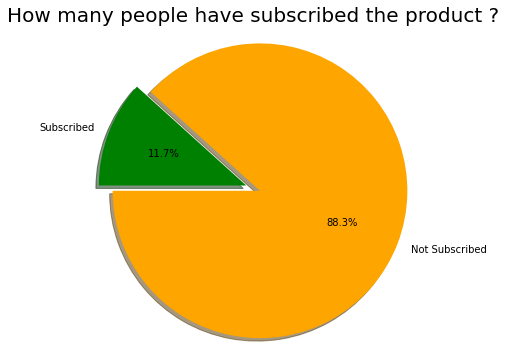

In [ ]:
#visualising how many customers have subscribed 
labels = 'Not Subscribed' , 'Subscribed'
sizes = df.y.value_counts()
colors = ['orange', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Only 11.7% people have subscribed to our product**

### **Bar Graph Representation of Each Variable**

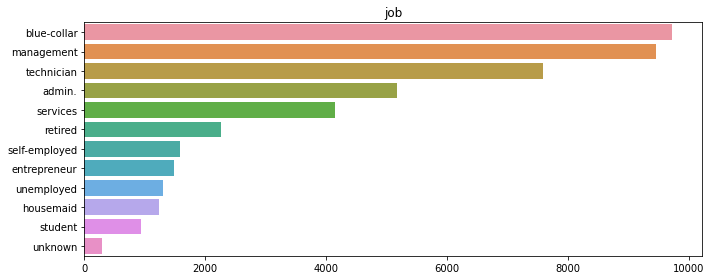

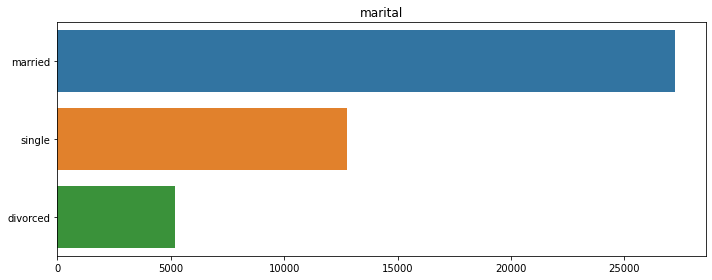

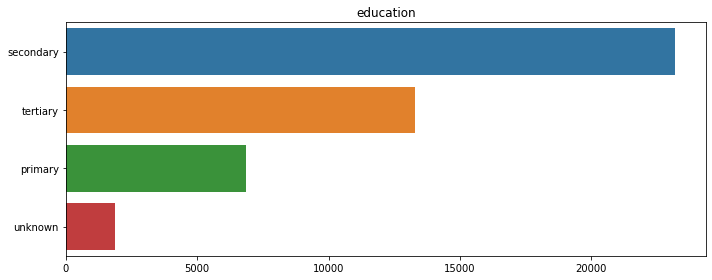

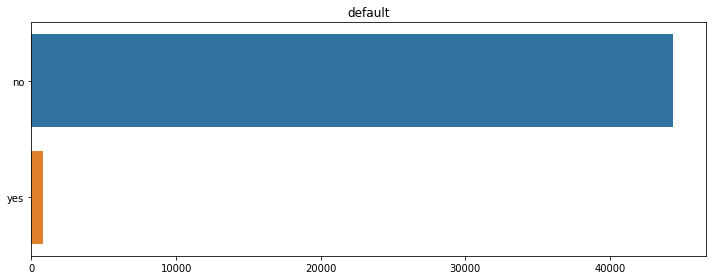

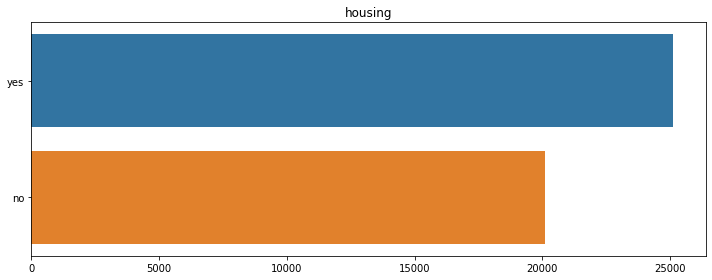

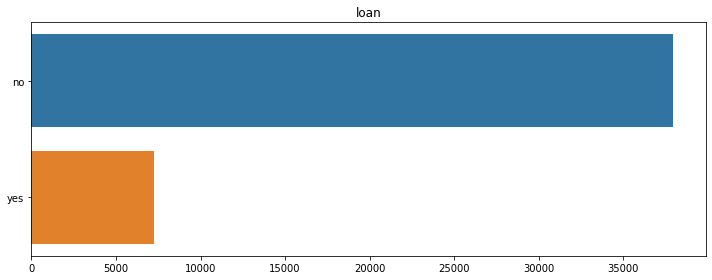

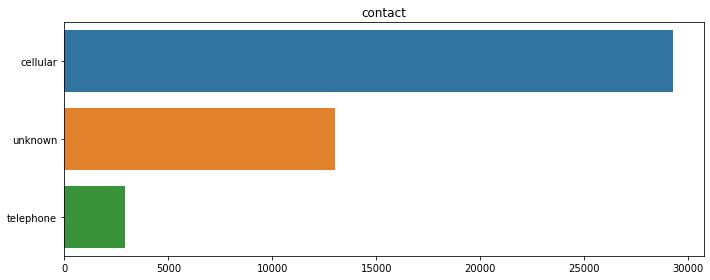

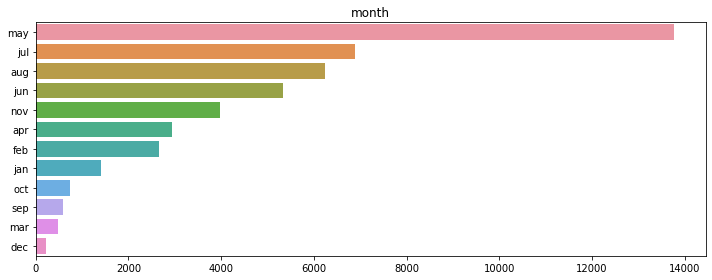

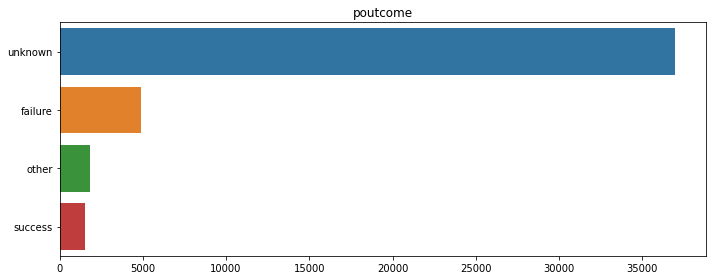

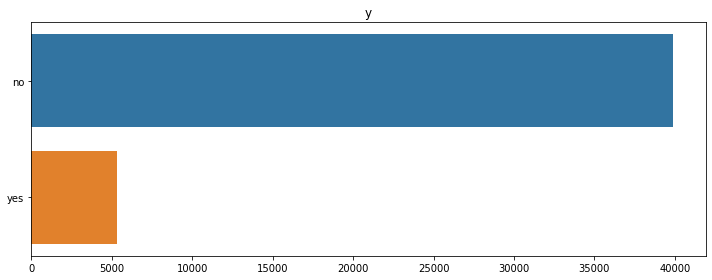

In [ ]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

#### **Graph Representation of each Categorical variable with respect to Target variable**

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})

In [ ]:
def bar_compare(x,y):
  sns.set_style("whitegrid")
  plt.figure(figsize=(18,6))
  sns.countplot(x=df[x],data=df,hue=df[y])
  plt.title('Count Plot of {x} for target variable Y'.format(x=x.title(),fontsize = 25))
  plt.show()

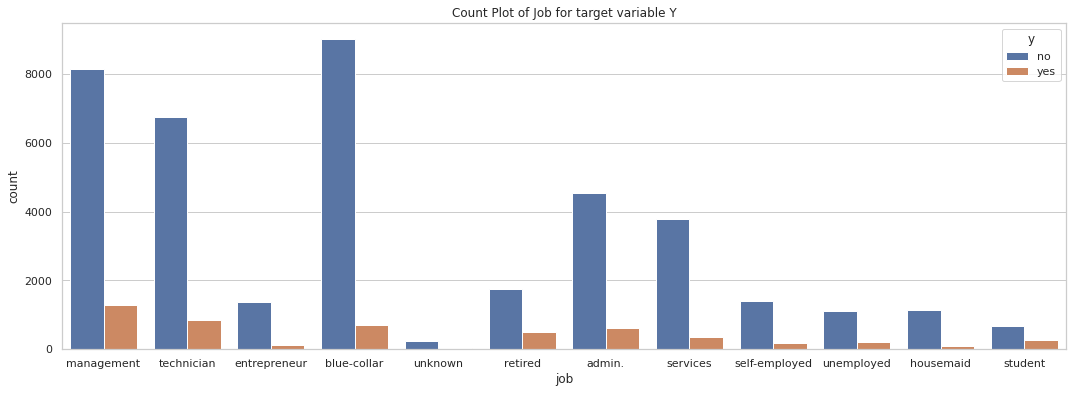

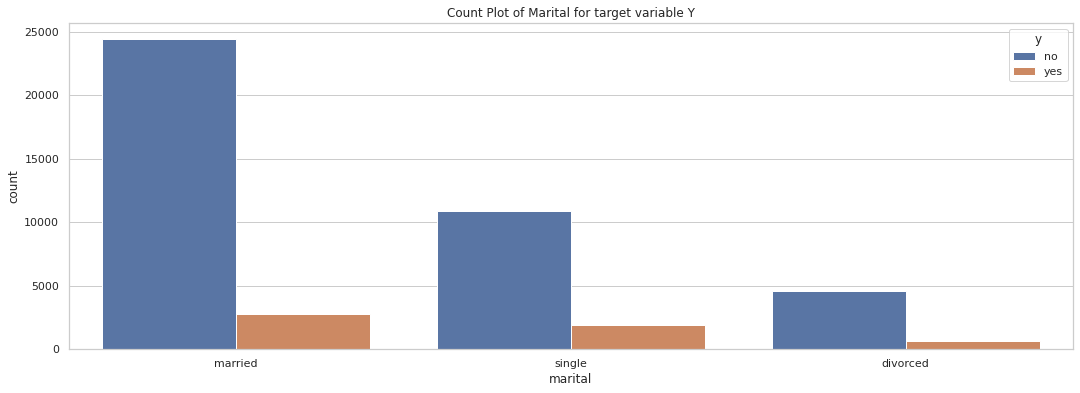

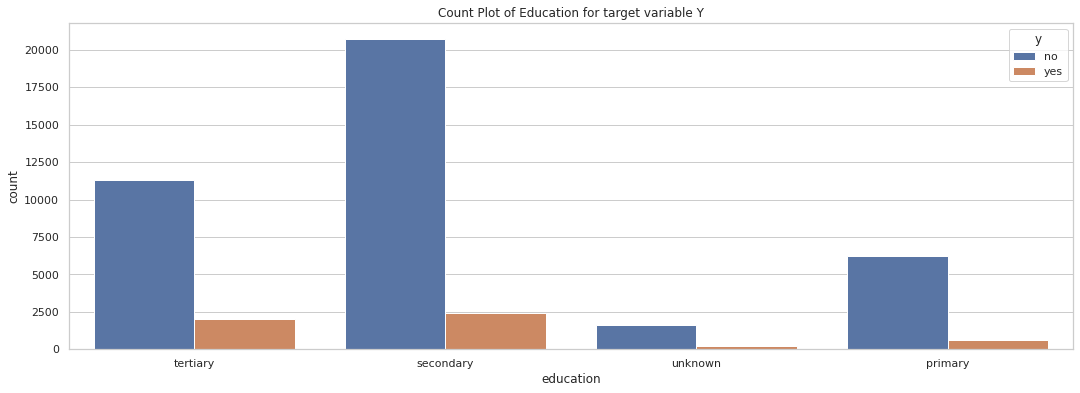

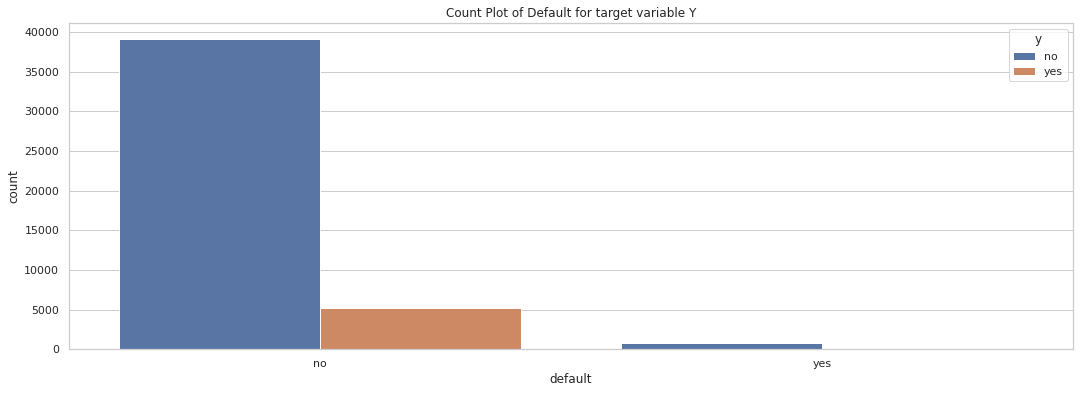

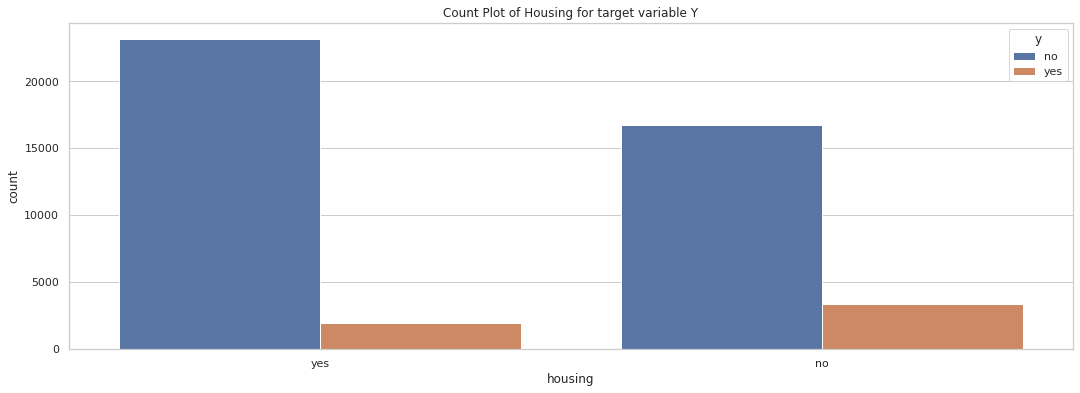

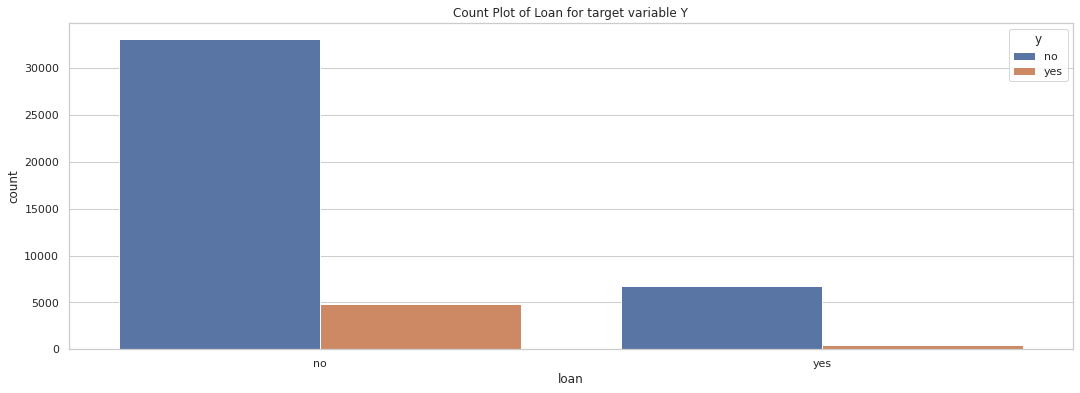

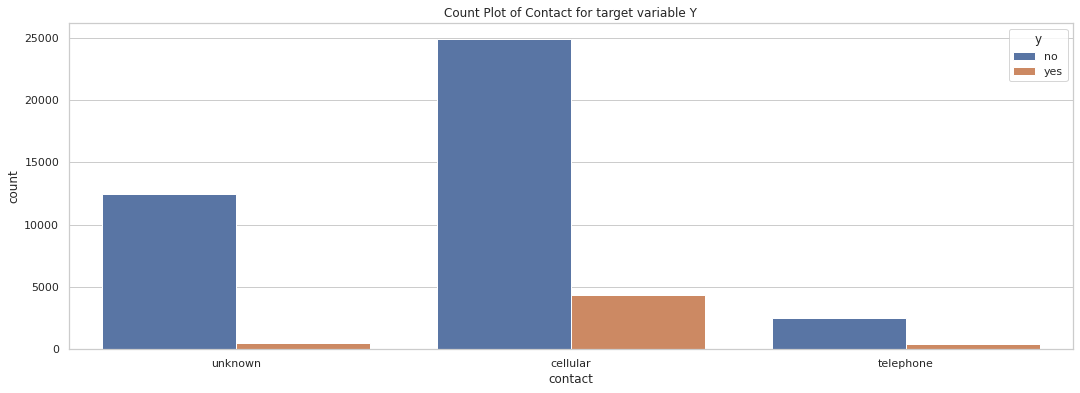

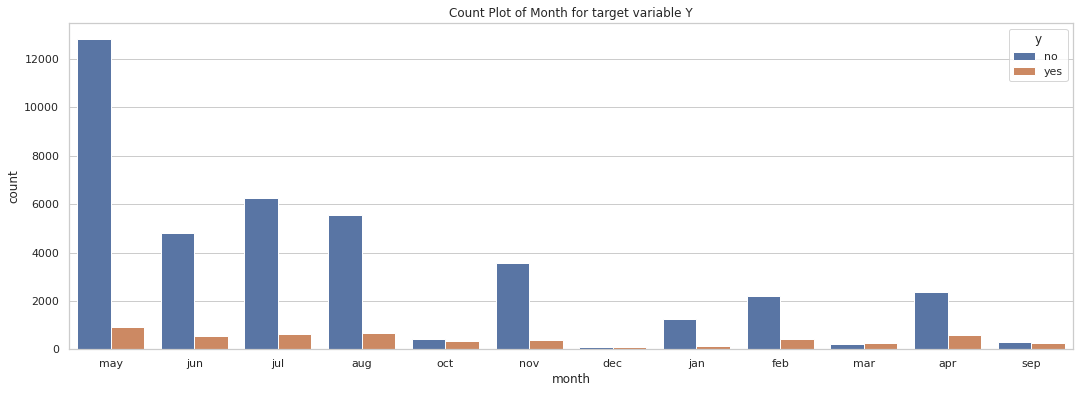

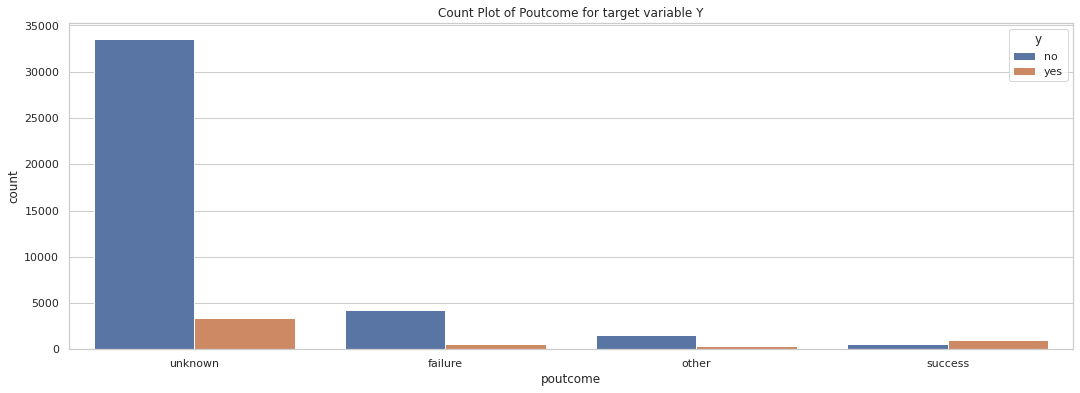

In [ ]:
#ploting countplot for different categorical columns
for col in category_cols[:-1]:
  bar_compare(col,'y')

**From the above plots we can analyze that:**

* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.
* Success rate is highest for student.
* Most of the clients contacted have previous outcome as 'unknown'.
* Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
* March has highest success rate.
* Most of the people are contacted through cellular.
* As seen for default variable, less client are contacted who have loan.
* Very few clients are contacted who are defaulter.
* Most of the people who are contacted have tertiray or secondary education.
* As we can see that married people are more tend to invest in product and have subscribed more in comparison to others.














#### **Age distribution in our dataset**

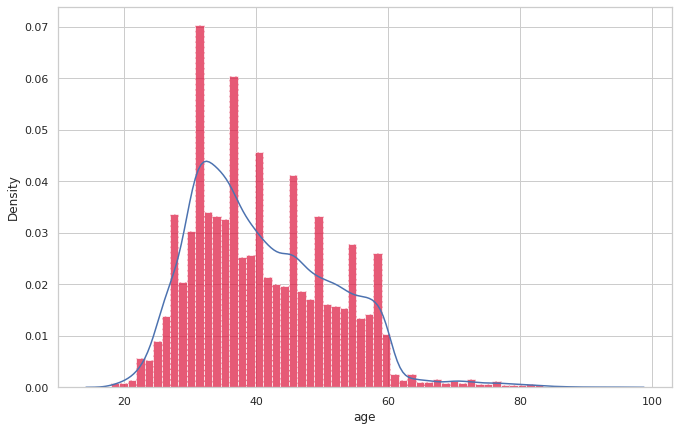

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df["age"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60); 

**Our dataset have more number of people in late 20s and early 30s**

#### **Pairplot Representation of each variable with respect to Target Variable**

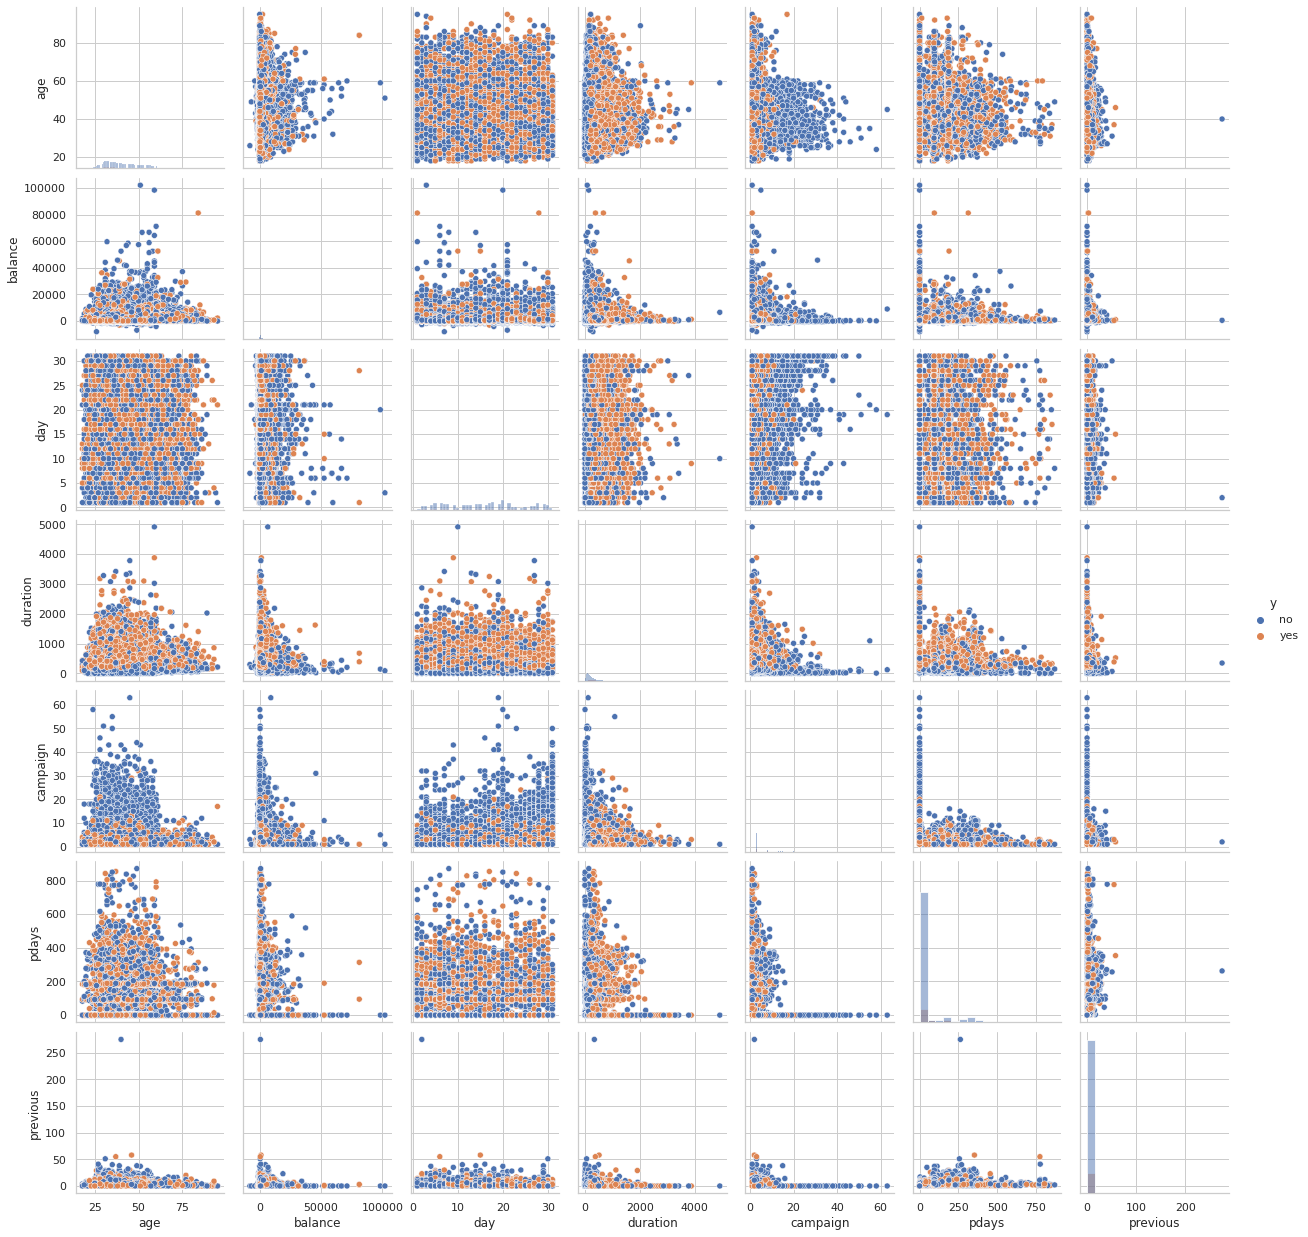

In [ ]:
sns.pairplot(df, hue="y",diag_kind="hist")
plt.show()

__Observation:__  
* For most of the variables our pair plot is overlapping a lot.
* Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

In [ ]:
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

#### **Scatter plot distribution of age vs balance**

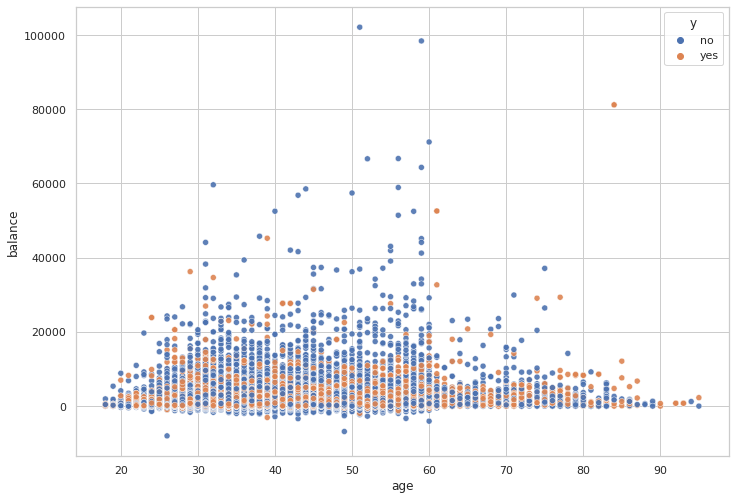

In [ ]:
#visualising age and balance with respect to whether customer has subscribed or not
sns.scatterplot(x="age", y="balance",hue='y',data=df,x_bins=50,y_bins=50,alpha=0.9)

**From above scatter plot we can see 40-60 age group people have subscribed the product. People having high balance have very low subscription rate.This also shows that our dataset have some balance below 0 and we can use this scatter plot to remove some outliers from our data set.**

#### **Scatter plot distribution of pdays vs duration**

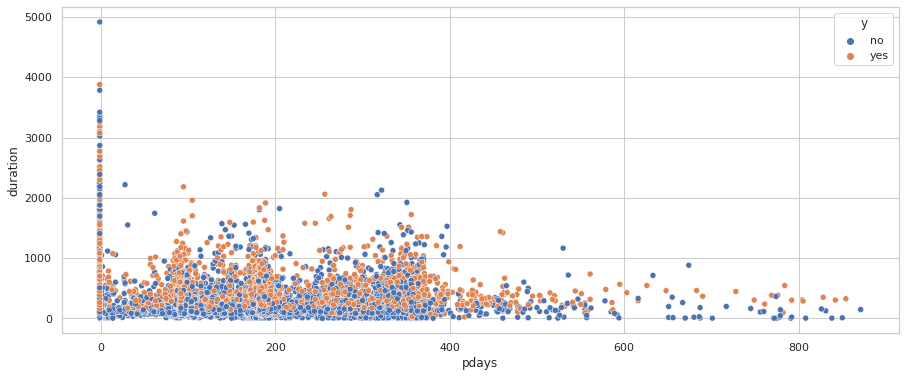

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['pdays'],y=df['duration'],hue=df['y'])
plt.show()

**As scatter plot is depicting that most of the client that had been last contacted falls in 0-400(days)**

#### **Scatter plot distribution of duration vs balance**

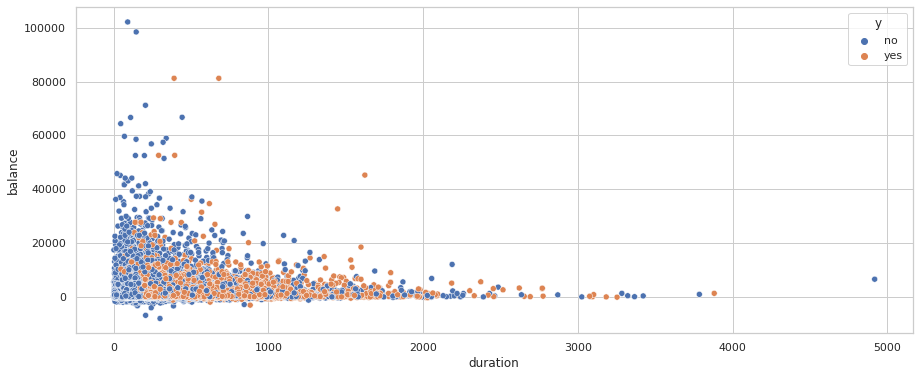

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['duration'],y=df['balance'] ,hue=df['y'])
plt.show()

**Most of the clients who have taken a term deposit do not have very high balance(mostly in between 0-20000)**

In [ ]:
#no.of calls performed in this campaign
df.groupby('y')['campaign'].mean()

y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64

**On average 2 calls leads to success for the clients who have taken a term deposit.**

### **Plotting education, campaign, day and sbscribed by taking 6000 random samples**

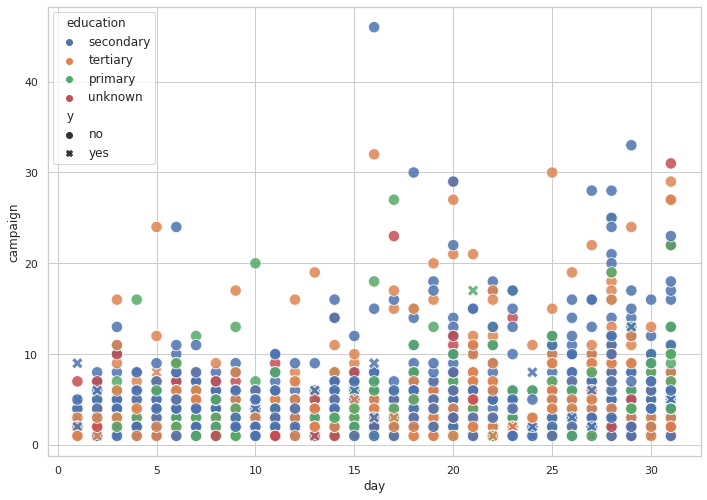

In [ ]:
sample=df.sample(6000)
sns.scatterplot(x="day", y="campaign", hue="education", data=sample,x_bins=50,y_bins=50,alpha=0.85, style="y",s=130 );

**This scatter plot shows that our campaign is more focused on people having secondary education. We also do more campaign on the month end. We need to focus on other education class as well also we need to be more uniform in our campaign accross all days of month.**

#### **Visualising age and balance relation with respect to subscribed**

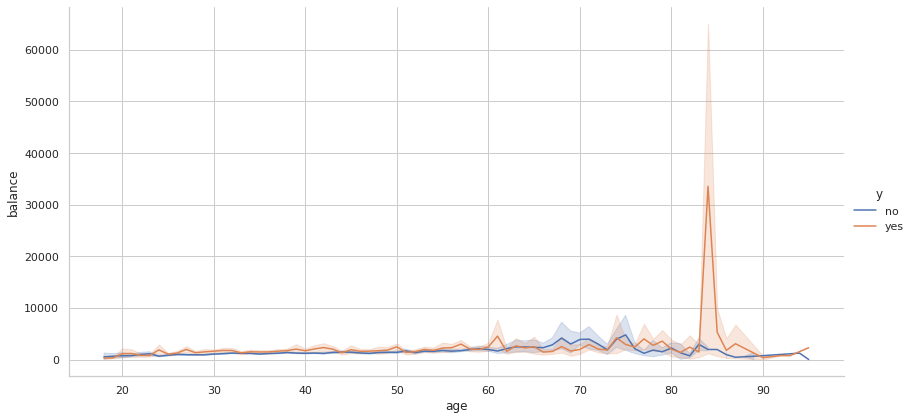

In [ ]:
sns.relplot(x="age", y="balance", kind="line", data=df, hue='y',height=6,aspect=2 );

***We can see that for age 20-60 people with having higher balance  are the ones who subscribe more. But as we move towards higher age we see mixed distribution of subscribing term deposit.*** 

### **Outliers Detection On Features**

**On duration Feature**

Text(0.5, 0, 'y:target variable')

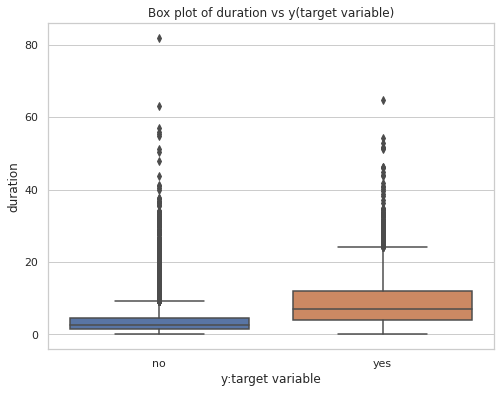

In [ ]:
# converting call duration from seconds to minute
plt.figure(figsize=(8,6))
df['duration'] = df['duration']/60
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

**On pdays Feature**

Text(0.5, 0, 'y: target variable')

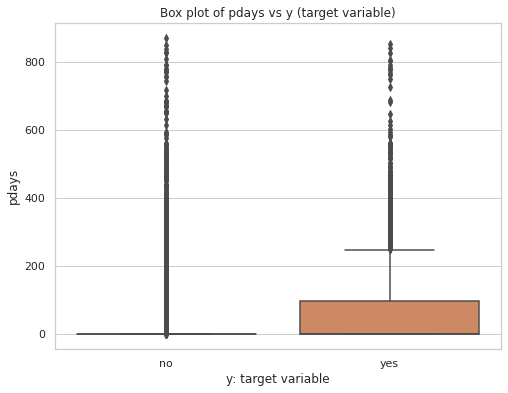

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

**On previous Feature**

Text(0.5, 0, 'y:target variable')

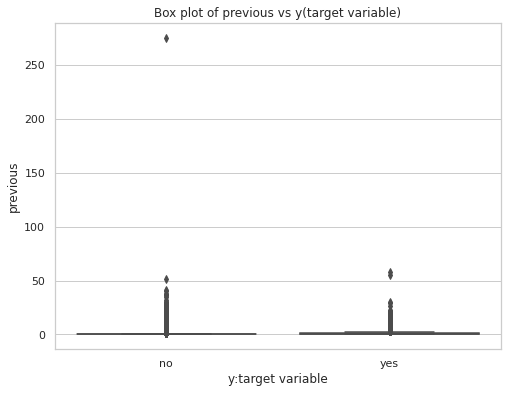

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

**On age Feature**

Text(0.5, 0, 'y:target variable')

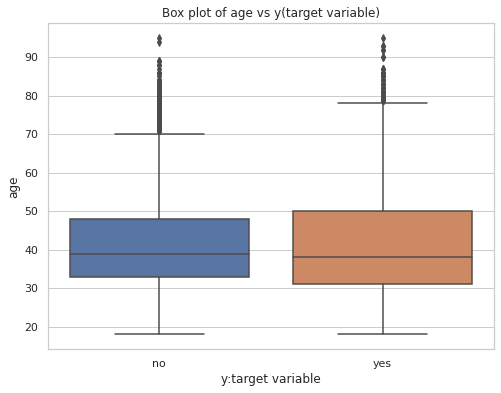

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

In [ ]:
data=df.copy()

#### **Replacing yes with 1 and No with 0**

In [ ]:
data.replace(to_replace={'y':'yes'}, value=1, inplace=True)
data.replace(to_replace={'y':'no'}, value=0, inplace=True)

#### **Converting categorical variables into numeric**

In [ ]:
# Converting categorical variables into numeric

data['job'] = data['job'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['contact'] = data['contact'].astype('category').cat.codes
data['poutcome'] = data['poutcome'].astype('category').cat.codes
data['month'] = data['month'].astype('category').cat.codes
data['default'] = data['default'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes

### **Heatmap of the dataset**

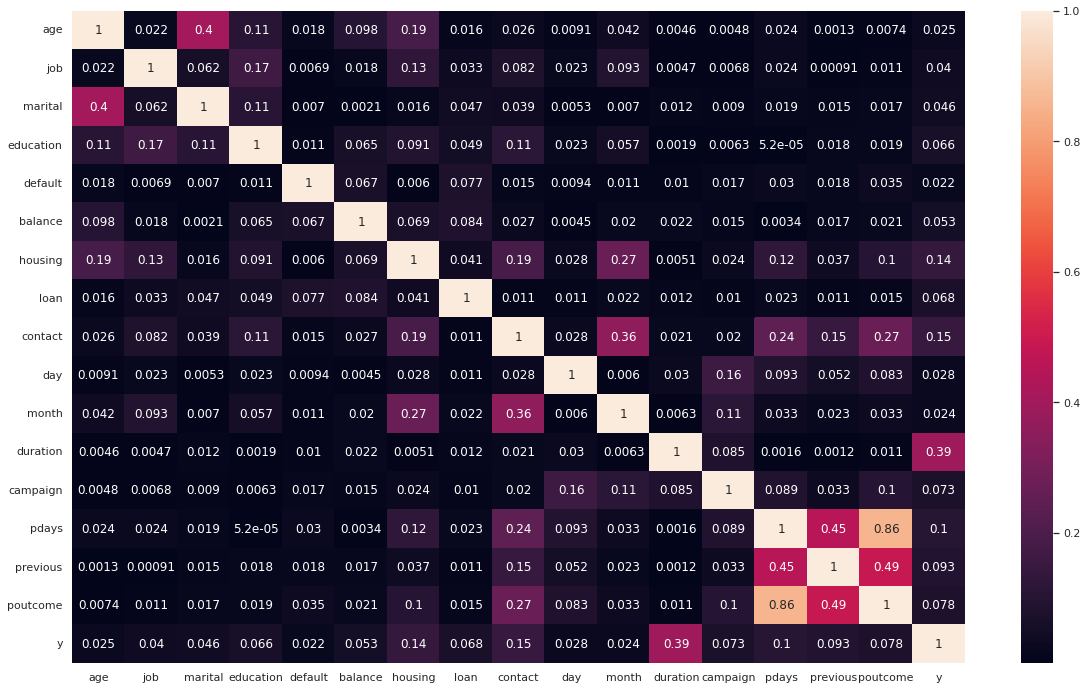

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr().abs(), annot=True)

**This shows that duration and housing are highly correlated with target variable y (Y/N). Also pdays are also impacting poutcome.**

**Splitting Dataset into Train set and Test set**

In [ ]:
X = data.drop(['y'], axis=1)
y = data['y']

#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 16) (36168,)
Test data shape (9043, 16) (9043,)


#### **Applying Decision Tree Classifier**

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = data.drop('y', axis=1).columns
indices = np.argsort(importances)

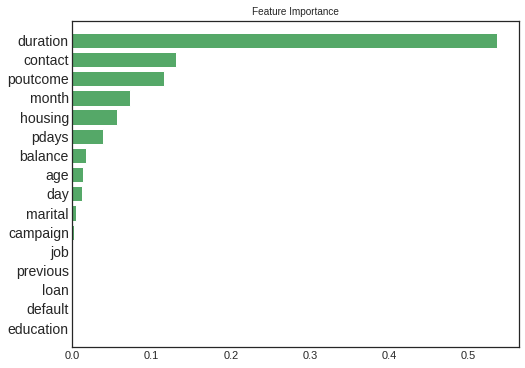

In [ ]:
plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(8,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

###**Feature Selection**

Important features we are going to consider for machine learning models:
* contact  
* poutcome  
* month  
* housing  
* pdays
* age  
* balance
* day
* marital
* campaign



Here, Target variable is highly influcenced by duration variable so we are not considering it.


#### **Selecting only those features which are important as per feature importance graph shown above**

In [ ]:
data=data[['contact','poutcome','month','housing','pdays','age','balance','day','marital','campaign','y']]

In [ ]:
data.head(2)

,contact,poutcome,month,housing,pdays,age,balance,day,marital,campaign,y
0,2,3,8,1,-1,58,2143,5,1,1,0
1,2,3,8,1,-1,44,29,5,2,1,0


**Splitting Dataset into training and testing**

In [ ]:
X=data.drop(['y'],axis=1)
y = data['y']

#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(data.drop(['y'], axis=1), y, test_size=0.20, random_state=42)

#### Checking VIF

In [ ]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating function for VIF calculation.
def cal_VIF(F):
 
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [ ]:
# calculating VIF for all numerical feature, except target variable-"y"

cal_VIF(df[[i for i in df.describe().columns if i !='y']])

,variables,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


# **Models Implementation**

**Logistic Regression**

**Logistic Regression (Under sampling)**

**Random Forest (Under sampling)**

**Random Forest (Over sampling)**

**KNN (Over sampling)**

**XGBoost (Over sampling)**







### **Applying Logistic Regression**

In [ ]:
#creating hyperparameter grid for Logistic regression
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}

#create hyperparameter grid for Random forest
rf_grid= {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf' : np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          }

In [ ]:
# dictionary to store accuracy and roc score for each model
score = {}

In [ ]:
#tune logistic regression
np.random.seed(42)
#setting up random search hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(class_weight='balanced'),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                scoring='roc_auc', return_train_score=True, n_jobs=-1)


# fit random search hyperparameter search for logistic regression
rs_log_reg.fit(x_train,y_train)
print('Best parameters:  {}'.format(rs_log_reg.best_params_))
print('Best score: {}'.format(rs_log_reg.best_score_))

Best parameters:  {'solver': 'liblinear', 'C': 0.012742749857031334}
Best score: 0.7132457631863106


**************************************************
Train AUC: 0.714
Test AUC: 0.704
**************************************************
Train Accuracy: 0.622
Test Accuracy: 0.615


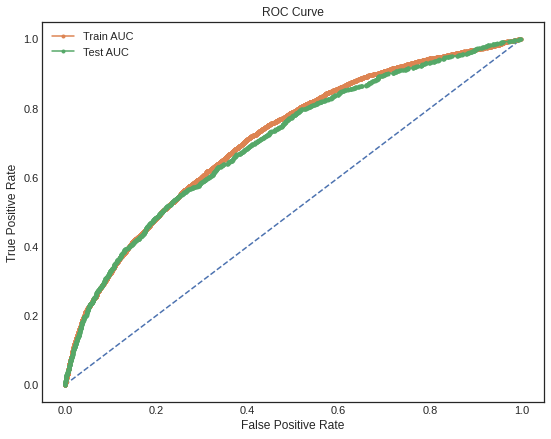

In [ ]:
from sklearn.metrics import log_loss

model = LogisticRegression(C=0.012742749857031334, solver='liblinear', n_jobs=-1,class_weight='balanced')
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73      7952
           1       0.19      0.68      0.30      1091

    accuracy                           0.61      9043
   macro avg       0.56      0.64      0.52      9043
weighted avg       0.84      0.61      0.68      9043



## **Performing Undersampling On Dataset**

In [ ]:
Yes = data[data['y']==1]
No = data[data['y']==0]

In [ ]:
print(Yes.shape,No.shape)

(5289, 11) (39922, 11)


In [ ]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(version=1)
X_res,y_res=nm.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((10578, 10), (10578,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 5289, 1: 5289})


In [ ]:
#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

####**Scaling dataset**

In [ ]:
#scaling our dataset for fit

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

## **Logistic Regression (Under Sampling)**

In [ ]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 5}
Best score: 0.9082915684316337


**************************************************
Train AUC: 0.908
Test AUC: 0.893
**************************************************
Train Accuracy: 0.855
Test Accuracy: 0.854


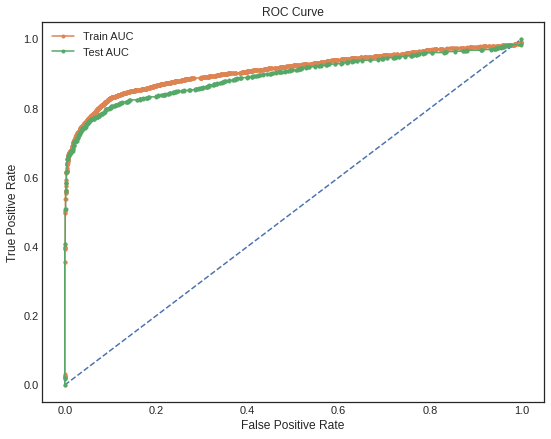

In [ ]:
from sklearn.metrics import log_loss

model = LogisticRegression(C=0.5, n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression (Under sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1092
           1       0.95      0.74      0.83      1024

    accuracy                           0.85      2116
   macro avg       0.87      0.85      0.85      2116
weighted avg       0.87      0.85      0.85      2116



### **Random Forest Classifier (Under Sampling)**

In [ ]:
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 500, 'max_depth': 10}
Best score: 0.9543778231655624


**************************************************
Train AUC: 0.992
Test AUC: 0.949
**************************************************
Train Accuracy: 0.958
Test Accuracy: 0.889


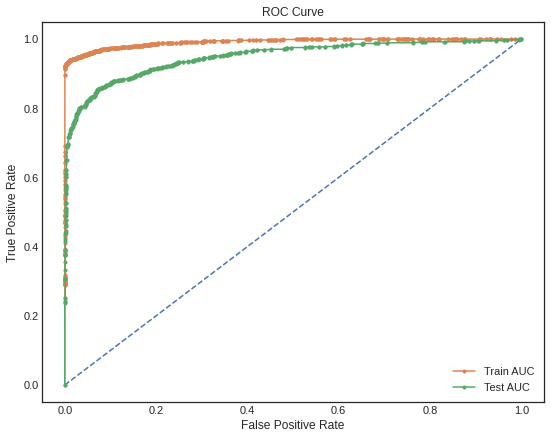

In [ ]:
model1 = RandomForestClassifier(n_estimators=500, max_depth=15, n_jobs=-1)
model1.fit(x_train, y_train)
y_probs_train = model1.predict_proba(x_train)
y_probs_test = model1.predict_proba(x_test)
y_predicted_train = model1.predict(x_train)
y_predicted_test = model1.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest (Under sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1092
           1       0.92      0.84      0.88      1024

    accuracy                           0.89      2116
   macro avg       0.89      0.89      0.89      2116
weighted avg       0.89      0.89      0.89      2116



### **Fixing our imbalanced data set with oversampling and applying a model**

In [ ]:
# splitting data with 64% as train and 36% as test data  
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.36, random_state=5, stratify=y)
# using combination of smote and tomek-links to over and undersample data 
from imblearn.combine import SMOTETomek

# defining smotetomek object
smo_tek = SMOTETomek(random_state=5)
x_train_smotek, y_train_smotek = smo_tek.fit_resample(x_train_o, y_train_o) #resampling training data and balance of class




In [ ]:
#Here checking the columns of balanced dataset
print(x_train_smotek.shape, '\n')
print(y_train_smotek.value_counts())

(49590, 10) 

0    24795
1    24795
Name: y, dtype: int64


In [ ]:
#Comparing the original dataset to the resampled dataset after applying smotomek method
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smotek)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 24795, 1: 24795})


In [ ]:
#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(x_train_smotek, y_train_smotek, test_size=0.20, random_state=42)

FEATURE SCALING

In [ ]:
#scaling our dataset for fit

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

### **1. Random Forest Classifier (Over Sampling)**

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
#RandomForest Classifier implmentation on our balanced dataset with few hyperparameters 
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)
RFCCV = (cross_val_score(rfc, x_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [ ]:
#displaying score 
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.892418


In [ ]:
#printing confusion matrix
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

RFC Confusion Matrix
 [[4375  564]
 [ 461 4518]]


In [ ]:
#printing classification report
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Reports
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      4939
           1       0.89      0.91      0.90      4979

    accuracy                           0.90      9918
   macro avg       0.90      0.90      0.90      9918
weighted avg       0.90      0.90      0.90      9918



**************************************************
Train AUC: 1.000
Test AUC: 0.954
**************************************************
Train Accuracy: 1.000
Test Accuracy: 0.897


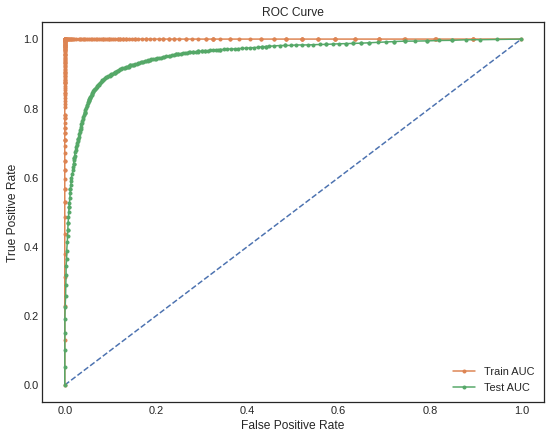

In [ ]:
y_probs_train = rfc.predict_proba(x_train)
y_probs_test = rfc.predict_proba(x_test)
y_predicted_train = rfc.predict(x_train)
y_predicted_test = rfc.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4939
           1       0.89      0.91      0.90      4979

    accuracy                           0.90      9918
   macro avg       0.90      0.90      0.90      9918
weighted avg       0.90      0.90      0.90      9918



###**2. KNN (Over Sampling)**

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
k_range = list(range(5, 31))
param_distributions = dict(n_neighbors=k_range)
clf = RandomizedSearchCV(knn, param_distributions, cv=10, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

In [ ]:
model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

### **XGBoost Model (Over Sampling)**

In [ ]:
#using XGBoost in RandomizedSearch to get best result

folds = 3
param_comb = 5
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}    
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb=XGBClassifier()

#xgb.fit(X_train, y_train)
random_search = RandomizedSearchCV(xgb,param_distributions= prams ,n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(x_train, y_train)
y_probs_train = random_search.predict_proba(x_train)
y_probs_test = random_search.predict_proba(x_test)
y_predicted_train = random_search.predict(x_train)
y_predicted_test = random_search.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

In [ ]:
score

**Random Forest(Under Sampling ) Model performing good among all models so considering it for the feature importance graph.**

# **Feature Importance**

In [ ]:
importances = model1.feature_importances_
feature_names = data.drop('y', axis=1).columns
indices = np.argsort(importances)

plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

# ** Techniques for Explainability in ML**

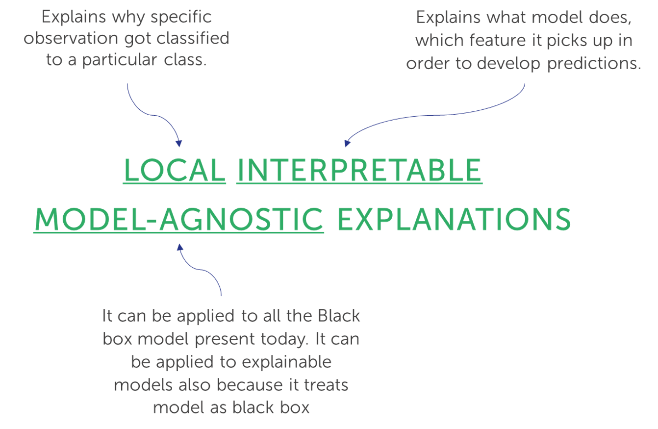

By generating an artificial dataset around the particular observation, we can try to approximate the predictions of the Black box model locally using a simple interpretable model. Then this model can be served as a ‘’local explainer’’ for the Black box model.

**However, the representation would vary with the type of data.** Lime supports Text data, Image data, and Tabular types of data:

*	**For text data:** It represents the presence or absence of words.

*	**For image:** It represents the presence or absence of super pixels.

*	**For tabular data:** It is a weighted combination of columns.


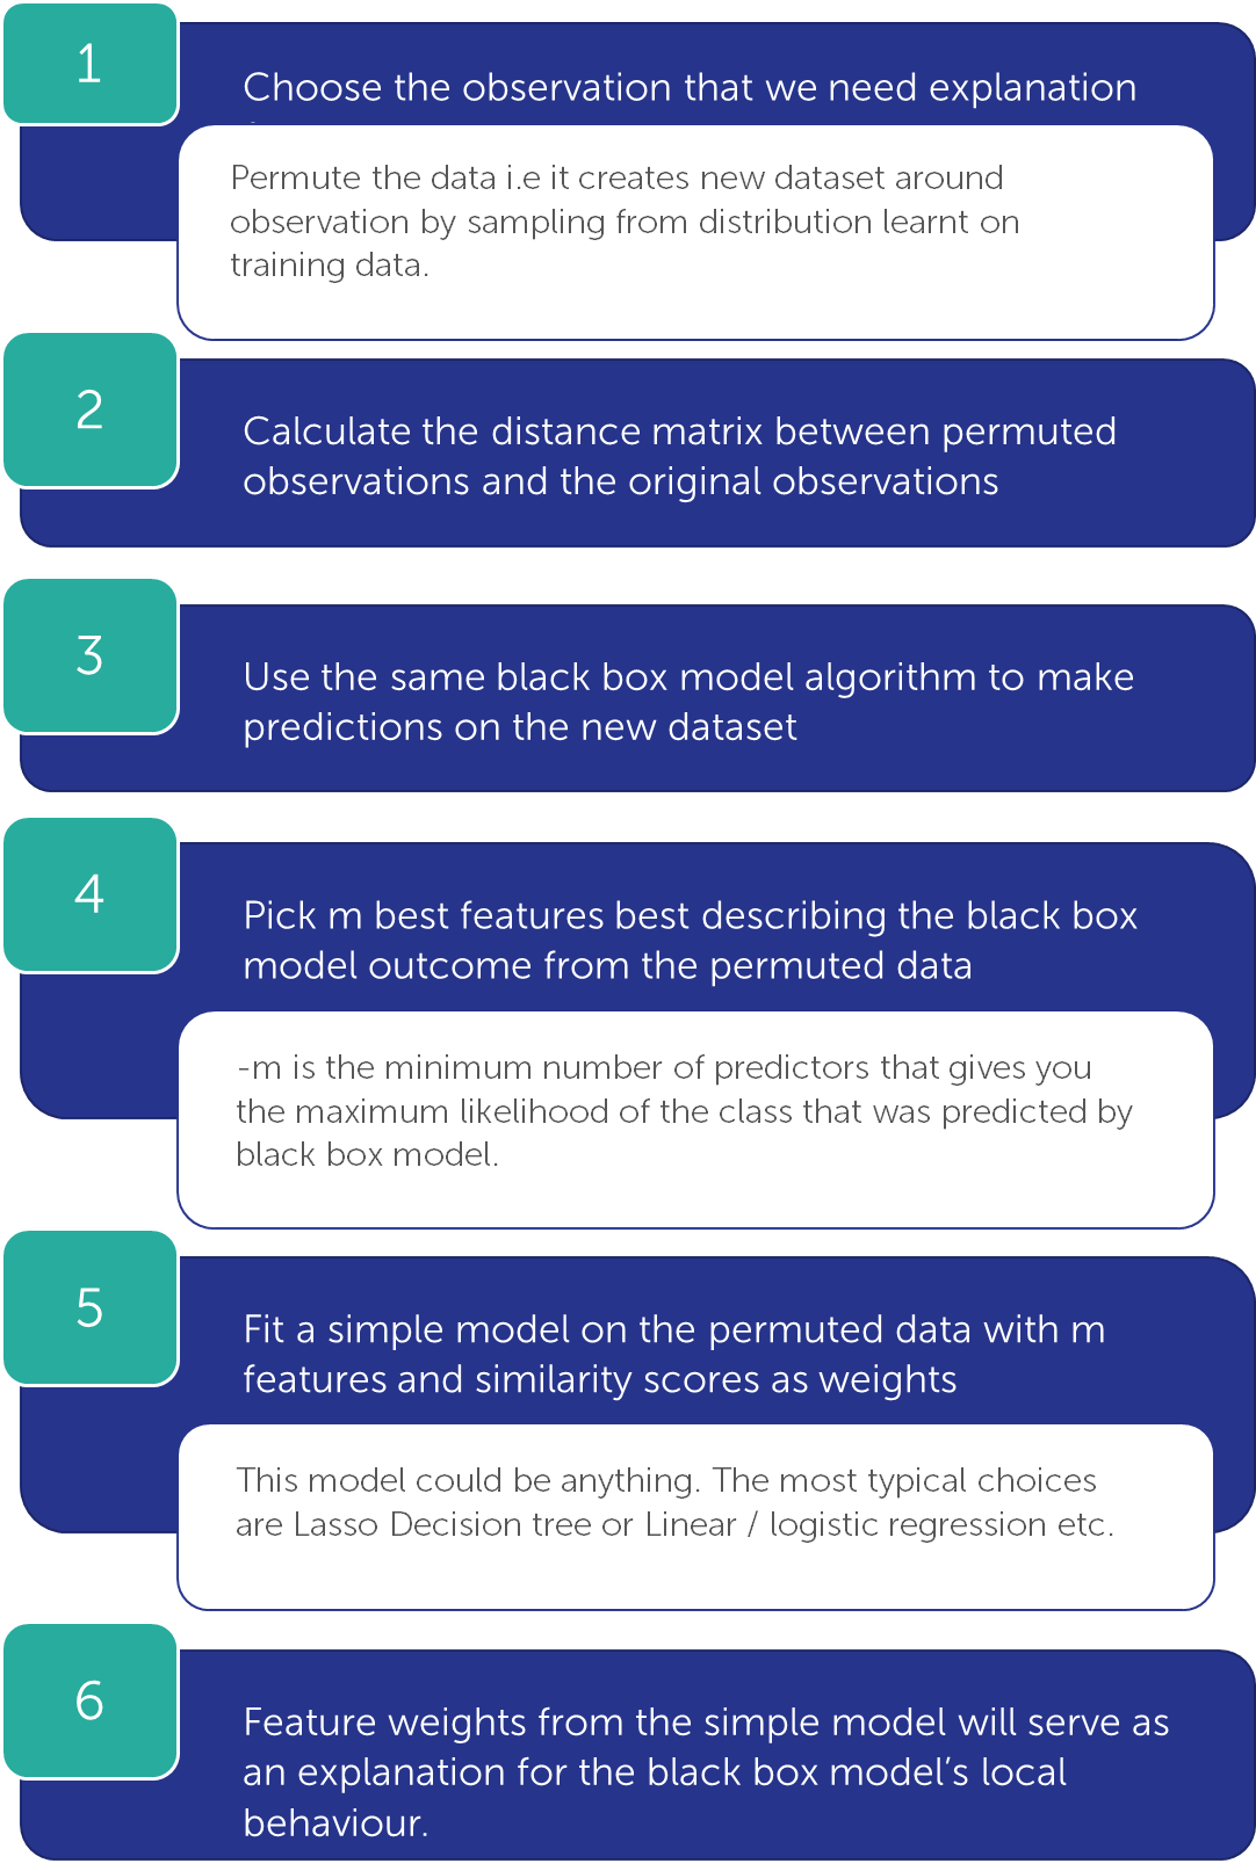

**Advantages of LIME :** 

1.	LIME can be implemented in Python (packages: lime, Skater) and R (Packages: lime, iml, DALEX). It is very easy to use.
2.	Most of these packages are very flexible. You can specify m - the number of features for the model, how you want to permute your data, any simple model that would fit data. 
3.	Furthermore LIME is the interpretation technique that works for tabular, text, and image data.
**Drawbacks of LIME :**

1.	The fitting of a linear model can be inaccurate (but we can check the R squared value to know if it is the case).
2.	Lime depends on the random sampling of new points (so it can be unstable).
3.	To be extra sure about the model understanding we can make use of SHAP in conjunction with LIME. 


### **LIME Implementation**RANDOM FOREST CLASSIFIER

In [ ]:
!pip install lime

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)





In [ ]:
X_test.iloc[4]#new data each time to see results

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),feature_names=X_train.columns,mode='classification')
#lime code to see the values in notebook
exp = interpretor.explain_instance(
    data_row=X_test.iloc[5], ##new data
    predict_fn=classifier.predict_proba
)

exp.show_in_notebook(show_table=True)


Above Lime explanability model over random forest classifier gives output with
'campaign' conducted less number of times and no contact specified are high probabilities to look after.

### ** XGB BOOST CLASSIFIER WITH LIME EXPLANATION**###

In [ ]:
# Model 2 - XGB Classifier
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
print("Xgboost Accuracy =",accuracy_score(y_validation, model_xgb.predict(X_validation)))
exp = interpretor.explain_instance(
    data_row=X_test.iloc[5], ##new data
    predict_fn=classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

Above lime explanability method is applied over xgb boost algorithm to interpret the results.
Hence day <= 16 and no contact details of customers are at high priority to not subscribe.




##SHAP: Shapley Additive Explanations**

**Definition:**

**SHAP (Shapley Additive exPlanations)** is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game? 

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values.
The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

**Working :**

SHAP procedure can be applied e.g. using a dedicated Python shap library. As an analyst, we can choose from three different explainers – functions within the shap library.
* 	TreeExplainer  - for the analysis of  decision trees
* 	DeepExplainer - for the deep learning algorithms
* 	KernelExplainer - for most other algorithms

We run the process always for a given observation. The starting point for the analysis is the average result in our data set. SHAP checks how the deviation from the average was impacted by each variable. SHAP explanation force plot in Python looks like this:



**The prediction starts from the baseline.** The baseline for Shapley values is the average of all predictions. 
Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output.  Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

**Advantages of SHAP :** 
* The method is solidly grounded in mathematics and game theory so we can be certain that it is unbiased (in the statistical sense).

**Disadvantages of SHAP :**

* 	**Computational inefficiency.** There are 2k possible coalitions for the given number of k factors so depending on the number of variables the analyst must use a different level of simplification assumptions. However, on the contrary, SHAP has a fast implementation for tree-based models.




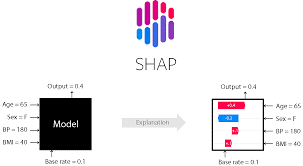

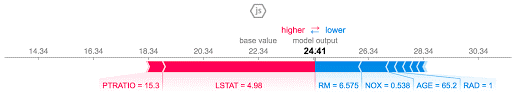

### **SHAP Implementation**

In [ ]:
!pip install shap

In [ ]:
X_test.iloc[0]

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz
sns.set_style('darkgrid') 

bank_df_copy=df.copy()
#bank_df_copy['y'] =bank_df_copy['y'].astype('category').cat.codes
X=bank_df_copy.iloc[:, 0:16]
y=bank_df_copy['y']
# Random Forest Classifier
classifier_dtc = RandomForestClassifier()
classifier_dtc.fit(X_train, y_train)
# Predicting the Test set results
y_pred= classifier_dtc.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_test,y_pred)
print("classification report :", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(classifier_dtc)

choosen_instance = X_test.iloc[4]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

shap.initjs()
# Visualize how model classified the entire data






# Calculate Shap values
#test.loc[[4]]
choosen_instance = X_test.iloc[4]
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(classifier_dtc)
# obtain shap values for the first row of the test data
shap_values= explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test.iloc[0]) 


Above shap model explanability method over xgb boost gives interpretation as:
contact column is crucial to contact the customer about subscription.
Hence no contact customers are at high probability of not being contacted.


In [ ]:
X_test.mean()

# **Conclusion**

*** It was a great learning experience working on a Bank dataset.**

*** Our dataset consist of categorical and numerical features.**

*** We have 17 independent features, out of these only half of them are important.** 

*** 'balance' is the most important feature while 'education' is the least important feature.**

*** Month of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.**

*** Different machine learning models are trained and tested on the dataset. Out of those Random Forest and XGBoost performs best. Logistic Regression is also an important model as it results in high AUC score.**

*** Different models are summarized in table below.** 

In [ ]:
print('***************  Comparison of different models  ****************')
table = PrettyTable(['Model', 'Test AUC', 'Test Accuracy','F1_score','Precision'])
for item in score.items():
    table.add_row([item[0], item[1][0], item[1][1], item[1][2], item[1][3]])
print(table)

# **Random Forest and XGBoost performing good among all models.**

#**THANK YOU**